# Twitch Streamer Success Analysis

This notebook contains the analysis for the subset of channels for which earnings data was available.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm 
import seaborn as sns

In [2]:
data = pd.read_csv('data/twitch-data-all.csv')
data = data.dropna()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   channel              788 non-null    object 
 1   watch_time_minutes   788 non-null    int64  
 2   stream_time_minutes  788 non-null    int64  
 3   peak_viewers         788 non-null    int64  
 4   average_viewers      788 non-null    int64  
 5   followers            788 non-null    int64  
 6   followers_gained     788 non-null    int64  
 7   views_gained         788 non-null    int64  
 8   partnered            788 non-null    bool   
 9   mature               788 non-null    bool   
 10  language             788 non-null    object 
 11  ranking              788 non-null    float64
 12  earnings_usd         788 non-null    float64
dtypes: bool(2), float64(2), int64(7), object(2)
memory usage: 75.4+ KB


## Correlation with Earnings

In [4]:
continuous_data = data.select_dtypes(include=['number'])
continuous_data = continuous_data.drop(["ranking"], axis=1)
correlation = continuous_data.corr(method='spearman')
round(correlation, 3)

,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,earnings_usd
watch_time_minutes,1.000,0.175,0.590,0.702,0.539,0.427,0.782,0.471
stream_time_minutes,0.175,1.000,-0.301,-0.481,-0.241,-0.345,0.057,0.134
peak_viewers,0.590,-0.301,1.000,0.721,0.581,0.600,0.583,0.276
average_viewers,0.702,-0.481,0.721,1.000,0.660,0.618,0.614,0.318
followers,0.539,-0.241,0.581,0.660,1.000,0.671,0.560,0.343
followers_gained,0.427,-0.345,0.600,0.618,0.671,1.000,0.450,0.273
views_gained,0.782,0.057,0.583,0.614,0.560,0.450,1.000,0.287
earnings_usd,0.471,0.134,0.276,0.318,0.343,0.273,0.287,1.000


In [5]:
metrics = [
    'watch_time_minutes', 
    'stream_time_minutes', 
    'peak_viewers', 
    'average_viewers', 
    'followers'
]
corr_usd = correlation['earnings_usd']
corr_usd = corr_usd[metrics].sort_values(ascending=False)
corr_usd.index = [x.replace('_', ' ').title() for x in corr_usd.index]
corr_usd

Watch Time Minutes     0.471185
Followers              0.342870
Average Viewers        0.317829
Peak Viewers           0.276189
Stream Time Minutes    0.134464
Name: earnings_usd, dtype: float64

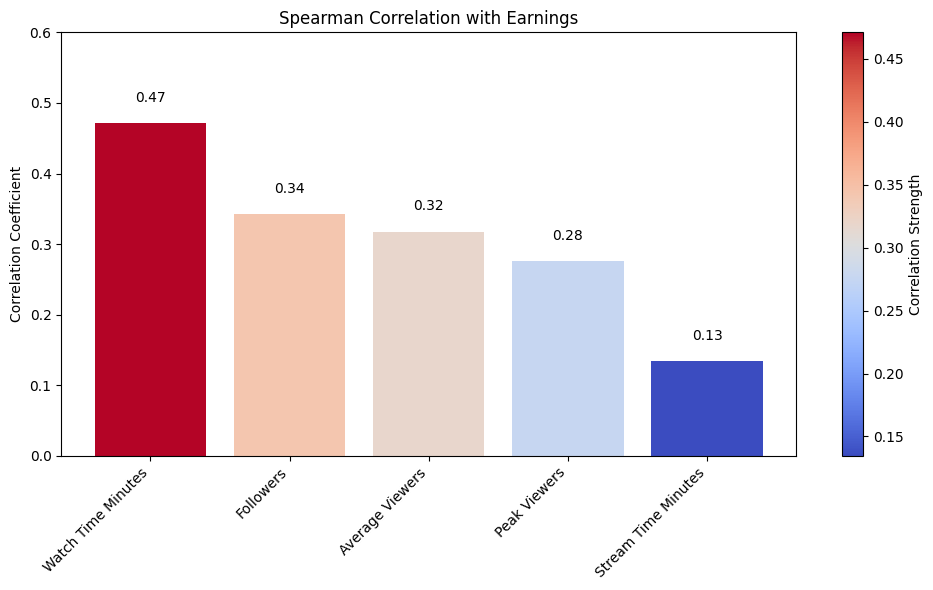

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create a colormap based on the correlation values
norm = plt.Normalize(min(corr_usd.values), max(corr_usd.values))
colors = cm.coolwarm(norm(corr_usd.values))

ax.bar(corr_usd.index, corr_usd.values, color=colors)
ax.set_xticks(range(len(corr_usd.index)))
ax.set_xticklabels(corr_usd.index, rotation=45, ha='right')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Spearman Correlation with Earnings')
ax.set_ylim(0, 0.6)

# Add a colorbar to show the color scale
sm = cm.ScalarMappable(cmap=cm.coolwarm, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Correlation Strength')

# Add text labels above each bar
for i, v in enumerate([x for x in corr_usd]):
    ax.text(i, v + 0.03, f'{v:.2f}', ha='center')

plt.tight_layout()

## Scatterplot top metrics vs earnings

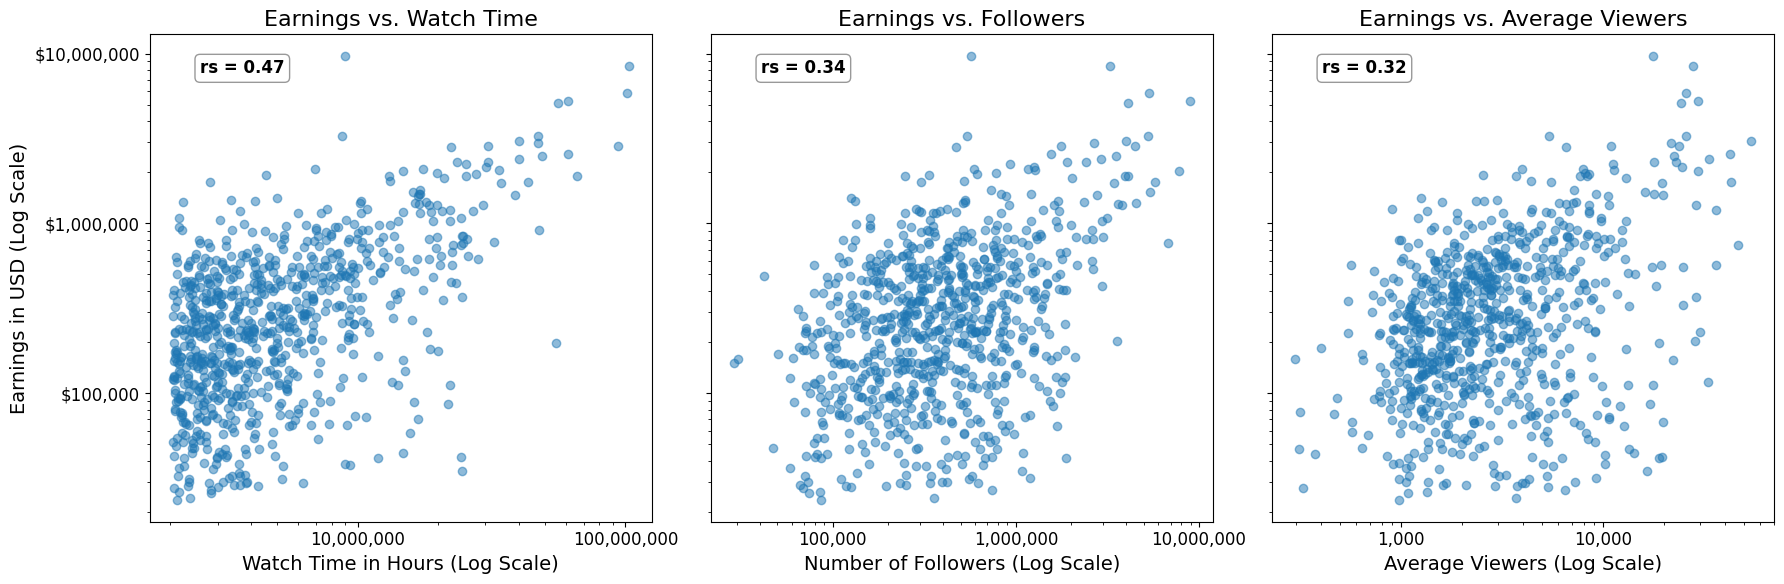

In [37]:
# Set font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

# Update font sizes globally
plt.rc('font', size=SMALL_SIZE)         
plt.rc('axes', titlesize=BIGGER_SIZE)   
plt.rc('axes', labelsize=MEDIUM_SIZE)   
plt.rc('xtick', labelsize=SMALL_SIZE)   
plt.rc('ytick', labelsize=SMALL_SIZE)   
plt.rc('legend', fontsize=SMALL_SIZE)   


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# First subplot - Watch Time vs Earnings
axes[0].scatter(data['watch_time_minutes']/60, data['earnings_usd'], alpha=0.5)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlabel('Watch Time in Hours (Log Scale)')
axes[0].set_ylabel('Earnings in USD (Log Scale)')
axes[0].set_title('Earnings vs. Watch Time')

# Add correlation coefficient annotation to first plot
axes[0].annotate(f"rs = {corr_usd['Watch Time Minutes']:.2f}", 
                 xy=(0.1, 0.92), 
                 xycoords='axes fraction', 
                 fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", alpha=0.8))


format_usd = ticker.StrMethodFormatter('${x:,.0f}')
axes[0].yaxis.set_major_formatter(format_usd)

format_x = ticker.StrMethodFormatter('{x:,.0f}')
axes[0].xaxis.set_major_formatter(format_x)

# Second subplot - Followers vs Earnings
axes[1].scatter(data['followers'], data['earnings_usd'], alpha=0.5)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel('Number of Followers (Log Scale)')
axes[1].set_title('Earnings vs. Followers')

axes[1].yaxis.set_major_formatter(format_usd)
axes[1].xaxis.set_major_formatter(format_x)
axes[1].set_ylabel('')  # Remove y-axis label
axes[1].tick_params(axis='y', labelleft=False)  # Remove y-axis tick labels

axes[1].annotate(f"rs = {corr_usd['Followers']:.2f}", 
                 xy=(0.1, 0.92), 
                 xycoords='axes fraction', 
                 fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", alpha=0.8))

# Third subplot - Average Viewers vs Earnings
axes[2].scatter(data['average_viewers'], data['earnings_usd'], alpha=0.5)
axes[2].set_xscale('log')
axes[2].set_yscale('log')
axes[2].set_xlabel('Average Viewers (Log Scale)')
axes[2].set_title('Earnings vs. Average Viewers')

axes[2].yaxis.set_major_formatter(format_usd)
axes[2].xaxis.set_major_formatter(format_x)
axes[2].set_ylabel('')  # Remove y-axis label
axes[2].tick_params(axis='y', labelleft=False)  # Remove y-axis tick labels

axes[2].annotate(f"rs = {corr_usd['Average Viewers']:.2f}", 
                 xy=(0.1, 0.92), 
                 xycoords='axes fraction', 
                 fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="grey", alpha=0.8))

plt.tight_layout()


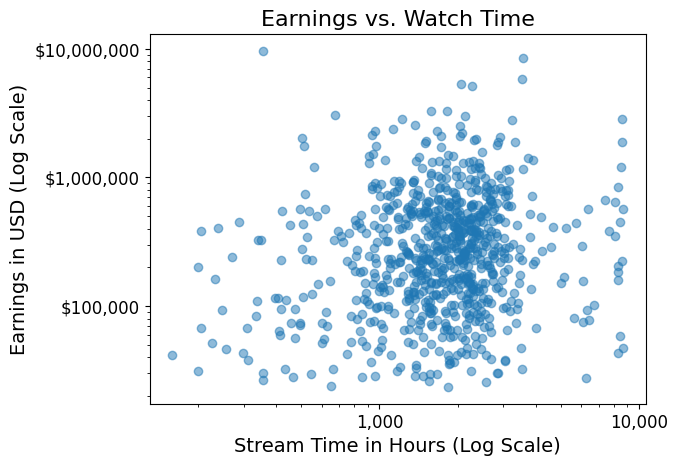

In [8]:
plt.scatter(data['stream_time_minutes']/60, data['earnings_usd'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Stream Time in Hours (Log Scale)')
plt.ylabel('Earnings in USD (Log Scale)')
plt.title('Earnings vs. Watch Time')

format_usd = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(format_usd)

format_x = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(format_x)

## Earnings by Average Viewers

In [9]:
data['average_viewers'].min()

np.int64(297)

In [10]:
viewership_bins = [100, 500, 1000, 5000, 10000, float('inf')]
data['viewer_bracket'] = pd.cut(
        data['average_viewers'], 
        viewership_bins, 
        labels=['100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
    )

earnings_by_viewers = data.groupby('viewer_bracket', observed=True)['earnings_usd'].agg(['mean', 'count'])
# earnings_by_viewers['mean'] = earnings_by_viewers['mean'] / 1000  # Convert to thousands for readability

In [11]:
earnings_by_viewers

,mean,count
viewer_bracket,,
100-500,8.845276e+04,8
500-1000,2.405622e+05,57
1000-5000,3.327933e+05,529
5000-10000,5.975262e+05,121
10000+,1.374638e+06,73


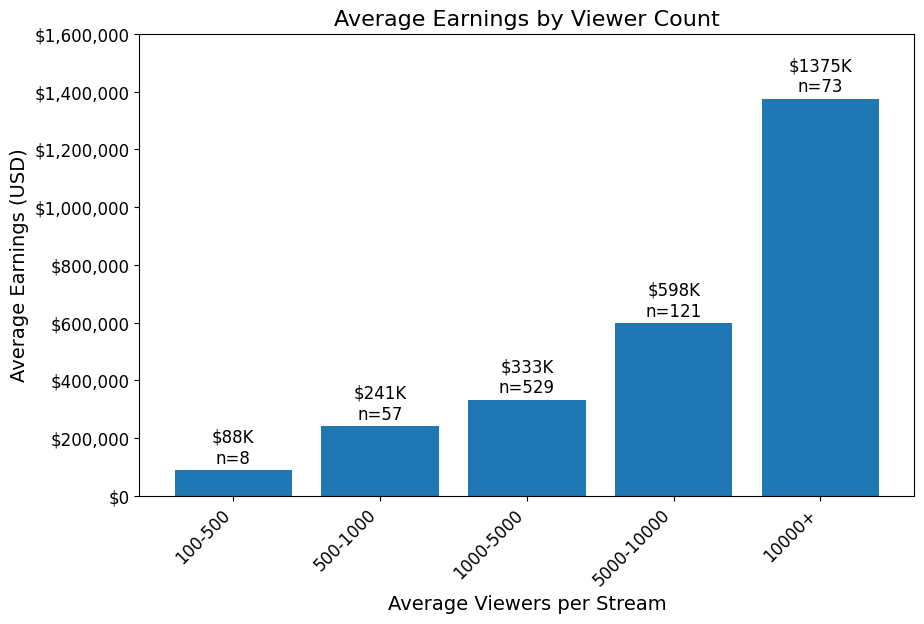

In [12]:
plt.subplots(figsize=(10, 6))

plt.bar(range(len(earnings_by_viewers)), earnings_by_viewers['mean'])
plt.xticks(range(len(earnings_by_viewers)), earnings_by_viewers.index, rotation=45, ha='right')
plt.title('Average Earnings by Viewer Count')
plt.xlabel('Average Viewers per Stream')
plt.ylabel('Average Earnings (USD)')
plt.ylim(0, 1600000)

format_usd = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(format_usd)


for i, v in enumerate(earnings_by_viewers['mean']):
    plt.text(i, v + 25000, f'${v/1000:.0f}K\nn={earnings_by_viewers["count"].iloc[i]}', ha='center')

## Earnings by Stream Time

In [13]:
stream_time_bins = [5000, 10000, 20000, 50000, 100000, float('inf')]
data['stream_time_bracket'] = pd.cut(data['stream_time_minutes'], stream_time_bins, 
                                   labels=['5K-10K', '10K-20K', '20K-50K', '50K-100K', '100K+'])

stream_time_stats = data.groupby('stream_time_bracket', observed=True)['earnings_usd'].agg(['mean', 'count'])
# stream_time_stats['mean'] = stream_time_stats['mean'] / 1000  # Convert to thousands

In [14]:
stream_time_stats

,mean,count
stream_time_bracket,,
5K-10K,41409.010000,1
10K-20K,158004.320000,15
20K-50K,466056.738615,65
50K-100K,410115.319409,254
100K+,499430.754768,453


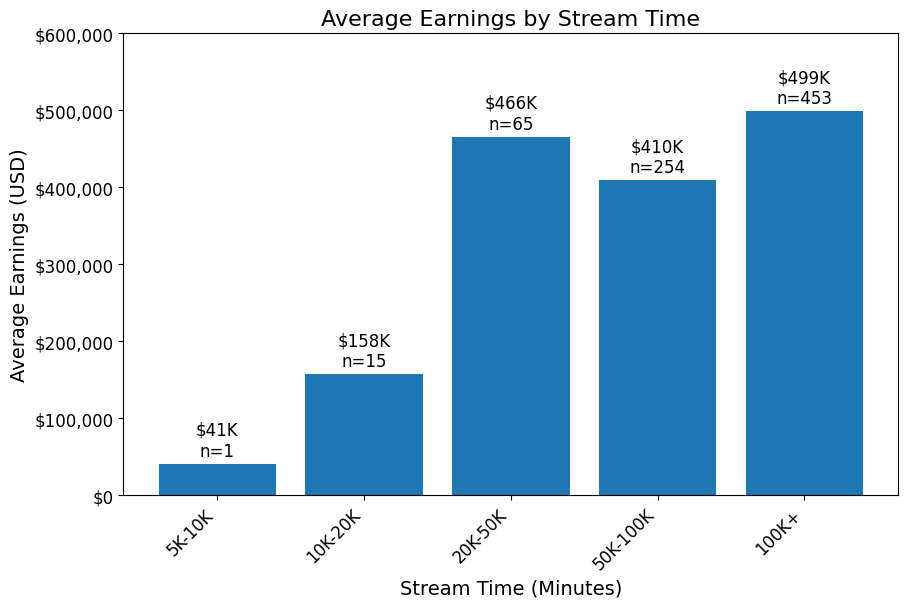

In [15]:
plt.subplots(figsize=(10, 6))

plt.bar(range(len(stream_time_stats)), stream_time_stats['mean'])
plt.xticks(range(len(stream_time_stats)), stream_time_stats.index, rotation=45, ha='right')
plt.title('Average Earnings by Stream Time')
plt.xlabel('Stream Time (Minutes)')
plt.ylabel('Average Earnings (USD)')
plt.ylim(0, 600000)

format_usd = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(format_usd)

for i, v in enumerate(stream_time_stats['mean']):
    plt.text(i, v + 10000, f'${v/1000:.0f}K\nn={stream_time_stats["count"].iloc[i]}', ha='center')

While stream time did not strongly correlate strongly with earnings, it is possible that streaming too little does impact earnings. Recommended streaming at least 20-50k minutes per year to reach the plateau in earnings.

## Earnings by Languages

In [16]:
language_stats = data.groupby('language').agg({
    'earnings_usd': 'mean',
    'channel': 'count',
    'average_viewers': 'mean'
}).rename(columns={'channel': 'streamer_count'}).sort_values('streamer_count', ascending=False)
language_stats['earnings_per_viewer'] = language_stats['earnings_usd'] / language_stats['average_viewers']

top_languages = language_stats.head(10).copy()
top_languages['earnings_per_viewer'] = round(top_languages['earnings_per_viewer'], 2)
top_languages['average_viewers'] = round(top_languages['average_viewers'])

In [17]:
round(top_languages)

,earnings_usd,streamer_count,average_viewers,earnings_per_viewer
language,,,,
English,581371.0,445,4622.0,126.0
French,342209.0,63,3543.0,97.0
Spanish,357708.0,61,6745.0,53.0
Portuguese,286802.0,52,3711.0,77.0
German,514356.0,47,4351.0,118.0
Russian,79104.0,38,5433.0,15.0
Turkish,148281.0,19,4804.0,31.0
Italian,447857.0,16,2264.0,198.0
Polish,138549.0,11,2652.0,52.0


In [18]:
# define color mappings for top languages
language_colors = {
    'English': '#1f77b4',
    'Korean': '#ff7f0e',
    'Russian': '#2ca02c',
    'Spanish': '#d62728',
    'French': '#9467bd',
    'Portuguese': '#8c564b',
    'German': '#e377c2',
    'Chinese': '#7f7f7f',
    'Turkish': '#bcbd22',
    'Italian': '#17becf',
    'Polish': '#aec7e8',
    'Thai': '#ffbb78'
    }

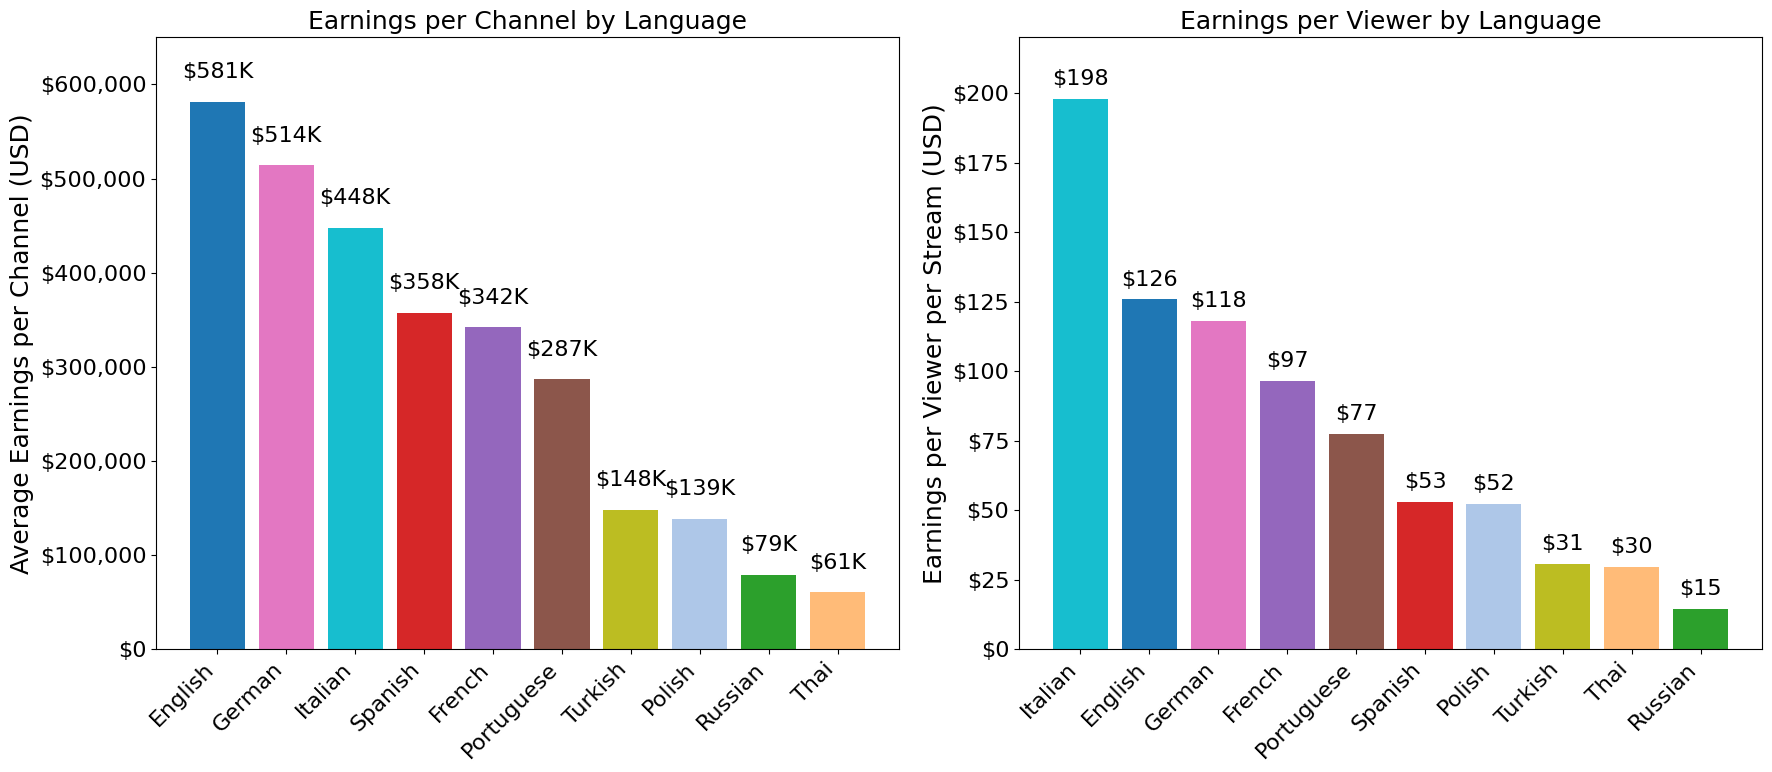

In [19]:
# Update font sizes globally
plt.rc('axes', titlesize=18)   
plt.rc('axes', labelsize=18)   
plt.rc('font', size=16)         
plt.rc('xtick', labelsize=16)   
plt.rc('ytick', labelsize=16)   
plt.rc('legend', fontsize=16)   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Average Earnings by Language
top_languages_earnings = top_languages.sort_values('earnings_usd', ascending=False)
colors_earnings = [language_colors.get(lang, '#333333') for lang in top_languages_earnings.index]

ax1.bar(range(len(top_languages_earnings)), top_languages_earnings['earnings_usd'], color=colors_earnings)
ax1.set_xticks(range(len(top_languages_earnings)))
ax1.set_xticklabels(top_languages_earnings.index, rotation=45, ha='right')
ax1.set_title('Earnings per Channel by Language')
ax1.set_ylabel('Average Earnings per Channel (USD)')
ax1.set_ylim(0, 650000)

format_usd = ticker.StrMethodFormatter('${x:,.0f}')
ax1.yaxis.set_major_formatter(format_usd)

for i, v in enumerate(top_languages_earnings['earnings_usd']):
    ax1.text(i, v + 25000, f'${v/1000:.0f}K', ha='center')

# Earnings per Viewer per Stream
top_languages_per_viewer = top_languages.sort_values('earnings_per_viewer', ascending=False)
colors_per_viewer = [language_colors.get(lang, '#333333') for lang in top_languages_per_viewer.index]

ax2.bar(range(len(top_languages_per_viewer)), top_languages_per_viewer['earnings_per_viewer'], color=colors_per_viewer)
ax2.set_title('Earnings per Viewer by Language')
ax2.set_ylabel('Earnings per Viewer per Stream (USD)')
ax2.set_xticks(range(len(top_languages_per_viewer)))
ax2.set_xticklabels(top_languages_per_viewer.index, rotation=45, ha='right')
ax2.set_ylim(0, 220)

ax2.yaxis.set_major_formatter(format_usd)

for i, v in enumerate(top_languages_per_viewer['earnings_per_viewer']):
    ax2.text(i, v + 5, f'${v:.0f}', ha='center')

plt.tight_layout()

English, German, and Italian channels seem to have the best ratio of earnings per viewer.

Although Spanish language channels have the most views, they only rank fourth in terms of earnings. Similarly, russian channels rank second for average viewers but ninth in average earnings. 

## Partnered vs Non-Partnered Earnings

* Being a Twitch partner means that you have access to Twitch's built-in monetization options such as subscriptions, bits, and ad revenue sharing. 
* Non-partnered channes can still make money through other means, either by being an 'Affiliate', or donations, sponsorships, subscriptions outside of twitch.

In [ ]:
partner_stats = data.groupby('partnered')['earnings_usd'].agg(['mean', 'std', 'count'])
partner_stats

,mean,std,count
partnered,,,
False,115696.675714,86820.059866,7
True,463901.034738,721411.575332,781


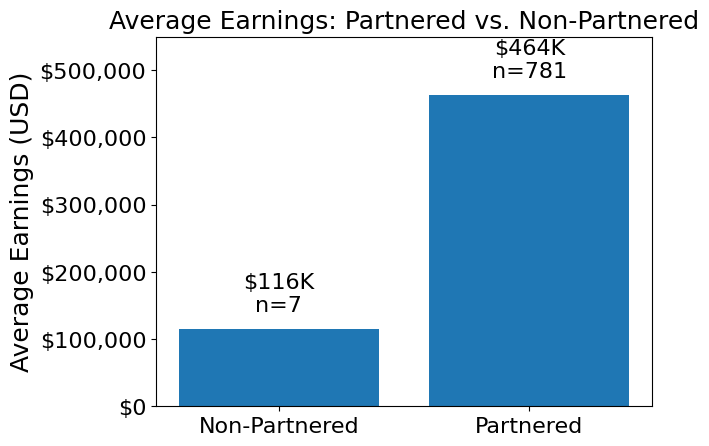

In [23]:
partner_labels = ['Non-Partnered', 'Partnered']
plt.bar(range(len(partner_stats)), partner_stats['mean'])
plt.xticks(range(len(partner_stats)), partner_labels)
plt.title('Average Earnings: Partnered vs. Non-Partnered')
plt.ylabel('Average Earnings (USD)')
plt.ylim(0, 550000)

format_usd = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(format_usd)

for i, v in enumerate(partner_stats['mean']):
    plt.text(i, v + 25000, f'${v/1000:.0f}K\nn={partner_stats["count"].iloc[i]}', ha='center')

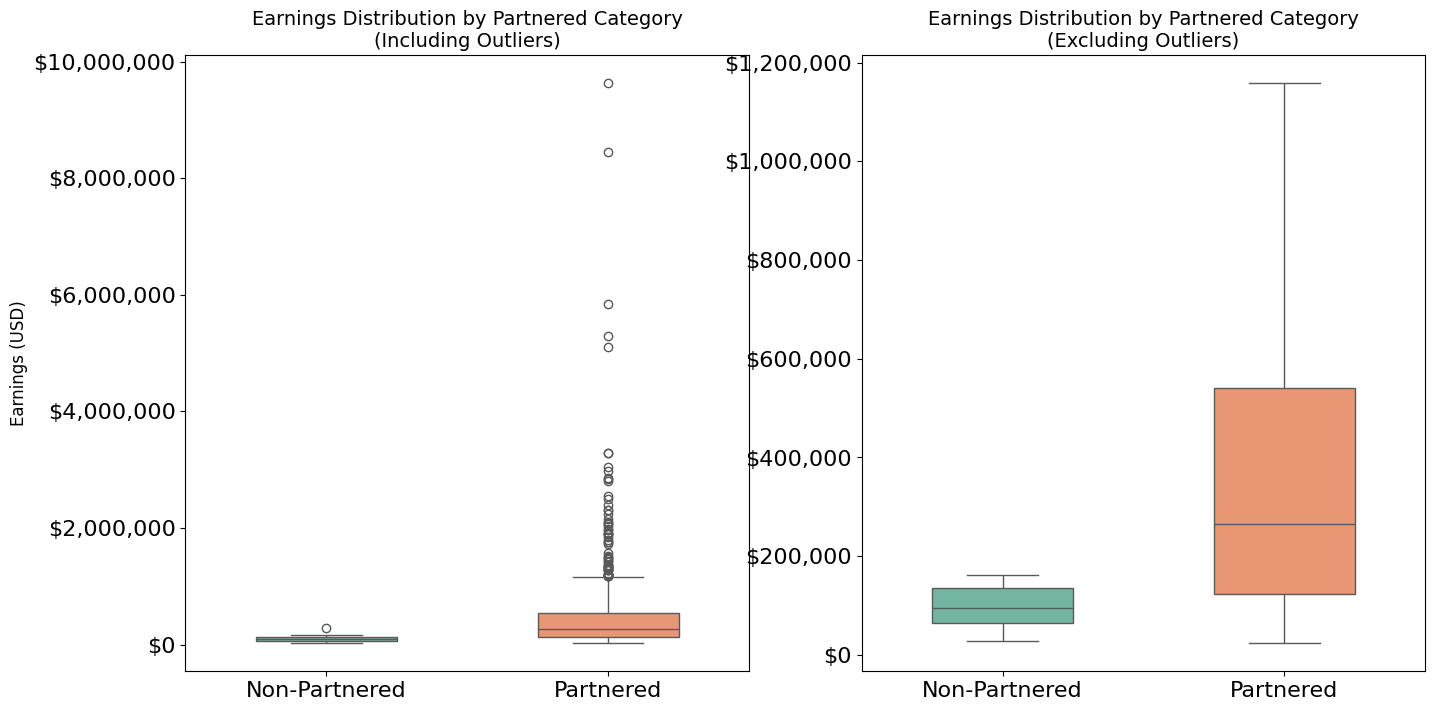

In [24]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# First box plot: Full data with outliers
sns.boxplot(x='partnered', 
            y='earnings_usd', 
            data=data, 
            ax=ax1, 
            palette='Set2', 
            hue='partnered', 
            dodge=False, 
            showfliers=True, 
            width=0.5)

ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Non-Partnered', 'Partnered'])
ax1.set_title('Earnings Distribution by Partnered Category\n(Including Outliers)', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Earnings (USD)', fontsize=12)

formatter = ticker.StrMethodFormatter('${x:,.0f}')
ax1.yaxis.set_major_formatter(formatter)

ax1.get_legend().remove()

# Second box plot: Without outliers
sns.boxplot(x='partnered', y='earnings_usd', data=data, ax=ax2, 
            palette='Set2', hue='partnered', dodge=False,
            showfliers=False, width=0.5)

ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Non-Partnered', 'Partnered'])
ax2.set_title('Earnings Distribution by Partnered Category\n(Excluding Outliers)', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('')
# ax2.set_yticklabels([])

ax2.yaxis.set_major_formatter(formatter)
ax2.get_legend().remove()

## Mature vs Non-Mature Content

In [25]:
mature_stats = data.groupby('mature')['earnings_usd'].agg(['mean', 'count'])
# mature_stats['mean'] = mature_stats['mean'] / 1000  # Convert to thousands
mature_stats

,mean,count
mature,,
False,482005.171127,577
True,402841.711469,211


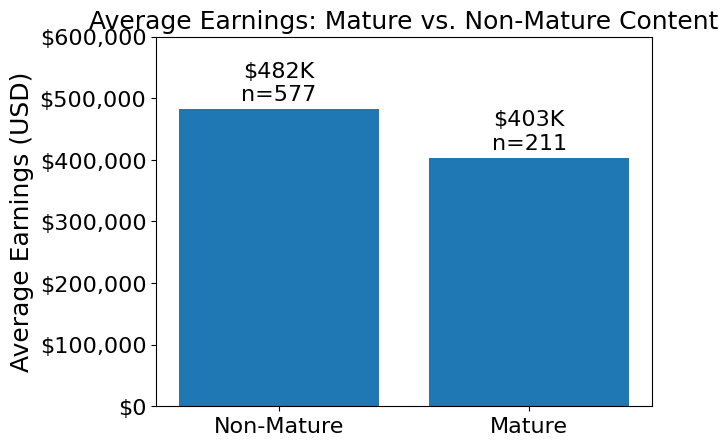

In [27]:
mature_labels = ['Non-Mature', 'Mature']
plt.bar(range(len(mature_stats)), mature_stats['mean'])
plt.xticks(range(len(mature_stats)), mature_labels)
plt.title('Average Earnings: Mature vs. Non-Mature Content')
plt.ylabel('Average Earnings (USD)')
plt.ylim(0, 600000)

plt.gca().yaxis.set_major_formatter(format_usd)

for i, v in enumerate(mature_stats['mean']):
    plt.text(i, v + 15000, f'${v/1000:.0f}K\nn={mature_stats["count"].iloc[i]}', ha='center')


In [27]:
data

,channel,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,partnered,mature,language,ranking,earnings_usd,viewer_bracket,stream_time_bracket
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,2.0,8454427.17,10000+,100K+
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,3.0,5847541.17,10000+,100K+
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,12.0,2844985.18,10000+,100K+
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,29.0,1903580.27,5000-10000,100K+
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,4.0,5295582.44,10000+,100K+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,ZiggyDLive,123398085,99075,18437,1227,173807,15899,4249580,True,False,English,1617.0,124020.20,1000-5000,50K-100K
993,LAGTVMaximusBlack,123125340,161535,7138,725,256353,13251,2310313,True,True,English,401.0,380499.30,500-1000,100K+
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish,4318.0,51515.60,5000-10000,10K-20K
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English,586.0,283763.15,1000-5000,100K+


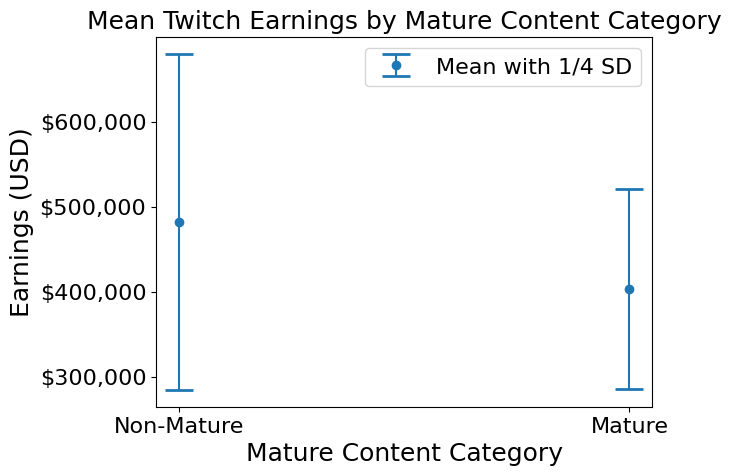

In [28]:
# Group by mature category and calculate statistics
stats = data.groupby('mature')['earnings_usd'].agg(['mean', 'std', 'count']).reset_index()

# Plot the mean points with error bars
plt.errorbar(
    range(len(stats)),
    stats['mean'],
    yerr=stats['std']/4,
    fmt='o',
    capsize=10,
    capthick=2,
    label='Mean with 1/4 SD'
)

# Add labels and title
plt.xlabel('Mature Content Category')
plt.ylabel('Earnings (USD)')
plt.title('Mean Twitch Earnings by Mature Content Category')
plt.xticks(range(len(stats)), ['Non-Mature', 'Mature'])

# Add a legend
plt.legend()

# Format y-axis to show currency in a more readable format
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)


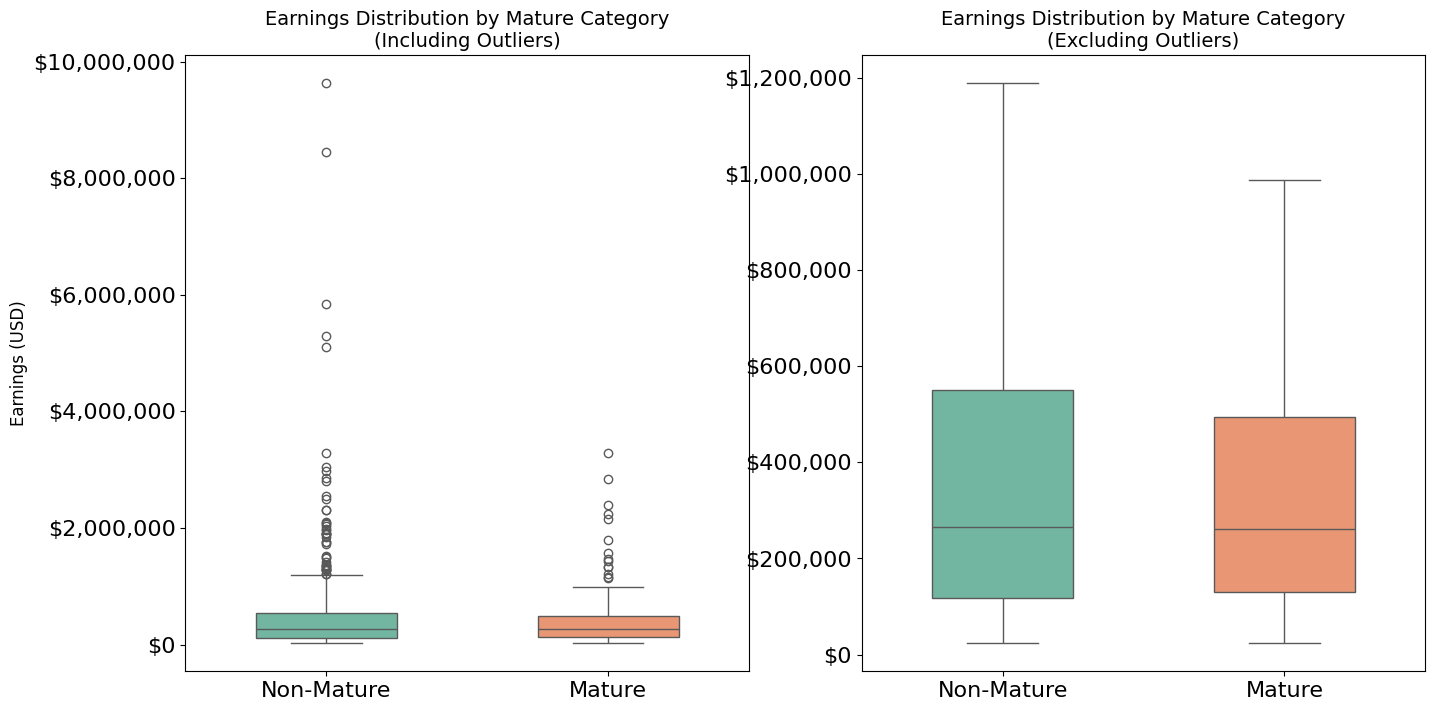

In [29]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# First box plot: Full data with outliers
sns.boxplot(x='mature', y='earnings_usd', data=data, ax=ax1, 
            palette='Set2', hue='mature', dodge=False, 
            showfliers=True, width=0.5)

ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Non-Mature', 'Mature'])
ax1.set_title('Earnings Distribution by Mature Category\n(Including Outliers)', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Earnings (USD)', fontsize=12)

formatter = ticker.StrMethodFormatter('${x:,.0f}')
ax1.yaxis.set_major_formatter(formatter)

ax1.get_legend().remove()

# Second box plot: Without outliers
sns.boxplot(x='mature', y='earnings_usd', data=data, ax=ax2, 
            palette='Set2', hue='mature', dodge=False,
            showfliers=False, width=0.5)

ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Non-Mature', 'Mature'])
ax2.set_title('Earnings Distribution by Mature Category\n(Excluding Outliers)', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('')
# ax2.set_yticklabels([])

ax2.yaxis.set_major_formatter(formatter)
ax2.get_legend().remove()

# # Add sample size annotations to both plots
# for ax in [ax1, ax2]:
#     # Count observations for each category
#     counts = data.groupby('mature')['earnings_usd'].count()
#     for i, mature in enumerate([False, True]):
#         ax.annotate(f'n={counts[mature]}', 
#                     xy=(i, ax.get_ylim()[0]), 
#                     xytext=(0, 15),
#                     textcoords='offset points',
#                     ha='center', va='bottom',
#                     fontsize=10)
